# **Clasificación**


In [24]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# MNIST

In [25]:
from sklearn.datasets import fetch_openml;
mnist = fetch_openml('mnist_784', version=1, as_frame=False);
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [26]:
x, y =mnist['data'],mnist['target'];
x.shape

(70000, 784)

In [27]:
y.shape


(70000,)

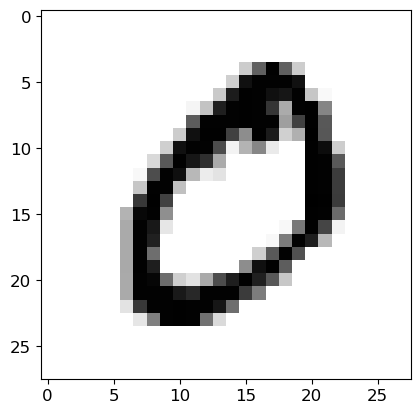

In [28]:
%matplotlib inline
import matplotlib as mpl;
import matplotlib.pyplot as plt;

some_digit = x[1]
some_digit_image = some_digit.reshape(28,28);
plt.imshow(some_digit_image, cmap=mpl.cm.binary);

In [29]:
y[1]

'0'

In [30]:
y = y.astype(np.int8)

In [31]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,interpolation="nearest")
    plt.axis("off")

In [32]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

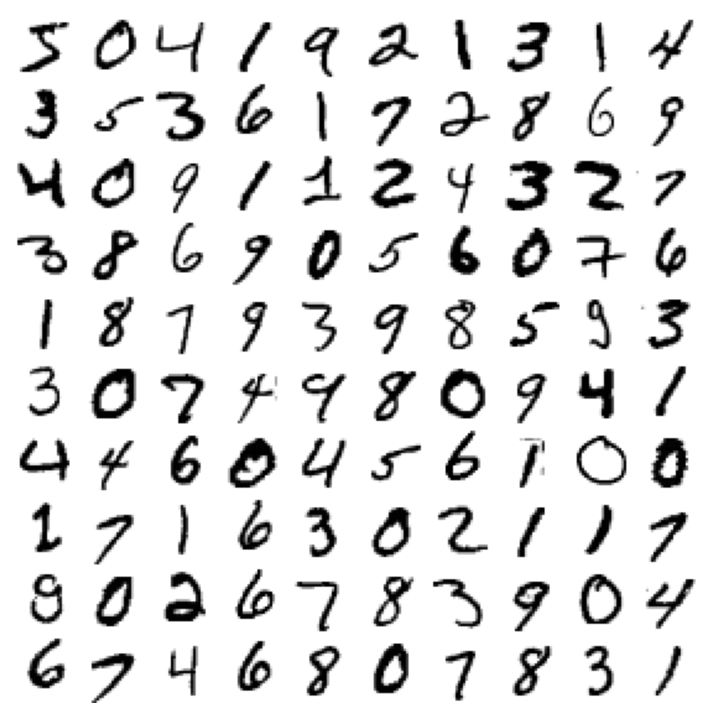

In [33]:
plt.figure(figsize=(9,9));
example_images = x[:100];
plot_digits(example_images, images_per_row=10);


# Entrenando un clasificador binario

Para ello vamos a considerar un clasificador que predice si una entrada es la imagen de un 5 o no.

In [36]:
from sklearn.linear_model import SGDClassifier;

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


NameError: name 'sgd_clf' is not defined

In [ ]:
sgd_clf.predict( [ X[0],X[1],X[2] ] )

# Medidas del rendimiento

## Midiendo la precisión por medio de la validación cruzada

In [23]:
from sklearn.model_selection import cross_val_score;

y_train:pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3);


NameError: name 'sgd_clf' is not defined

Esta validación cruzada tiene el defecto que no podemos controlar la cantidad de '5's que hay en cada grupo, introduciendo por tanto sesgos.
Para ello usamos **StratifiedKFold**, una heramienta que divide el conjunto de datos de forma que permanecen en igual proporción ambas categorías (5s y no 5s).

In [ ]:
from sklearn.model_selection import StratifiedKFold;

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42);

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = SGDClassifier(max_iter=1000, random_state=42);
    X_train_folds = X_train[train_index];
    y_train_folds = y_train_5[train_index];
    X_test_fold = X_train[test_index];
    y_test_fold = y_train_5[test_index];

    clone_clf.fit(X_train_folds, y_train_folds);
    y_pred = clone_clf.predict(X_test_fold);
    n_correct = sum(y_pred == y_test_fold);
    print(n_correct / len(y_pred));

0.9669
0.91625
0.96785


Todo pinta bien, ¿no? bastante preciso. Peeeero .....

Vamos a hacer un clasificador propio, desde cero.

In [16]:
from sklearn.base import BaseEstimator;

class Never5Classifier(BaseEstimator):
    
    def fit(self, X, y=None):
        pass;
    
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool);




In [22]:
from sklearn.model_selection import cross_val_score;

never_5_clf = Never5Classifier();
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")


NameError: name 'x_train' is not defined

**Acabamos de hacer un clasificador binario nulo (siempre predice False), que tiene una precisión de más del 90% de media!!**

## Matriz de confusión

In [20]:
from sklearn.model_selection import cross_val_predict;



In [39]:
from sklearn.metrics import confusion_matrix;



array([[54579,     0],
       [    0,  5421]])

## Precision y Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score;

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [40]:
cm = confusion_matrix(y_train_5, y_train_pred);
cm[1,1]/(com[0,1]+cm[1,1])

NameError: name 'y_train_5' is not defined

In [41]:
recall_score(y_train_5, y_train_pred)

NameError: name 'recall_score' is not defined

In [42]:
cm[1,1]/(com[0,1]+cm[1,1])

NameError: name 'cm' is not defined

In [43]:
from sklearn.metrics import f1_score;

f1_score(y_train_5, y_train_pred)

NameError: name 'y_train_5' is not defined

In [ ]:
cm[1,1]/(cm[1,1]+(cm[1,0]+cm[0,1])/2)

0.7325171197343847

## El equilibro entre Precision y Recall

array([-5897.37359354])

array([False])

array([False])

In [ ]:
from sklearn.metrics import precision_recall_curve;



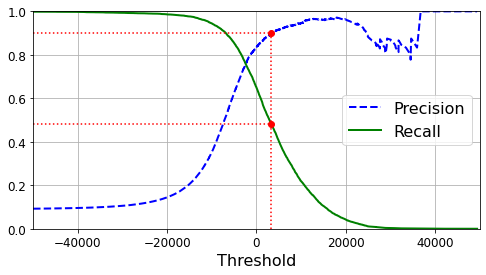

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2);
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2);
    plt.legend(loc="center right", fontsize=16);
    plt.xlabel("Threshold", fontsize=16);
    plt.grid(True);
    plt.axis([-50000, 50000, 0, 1]);

recall_90_precision = recalls[np.argmax(precisions >= 0.90)];
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)];

plt.figure(figsize=(8, 4));
plot_precision_recall_vs_threshold(precisions, recalls, thresholds);
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:");
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:");
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:");
plt.plot([threshold_90_precision], [0.9], "ro");
plt.plot([threshold_90_precision], [recall_90_precision], "ro");
plt.show();

True

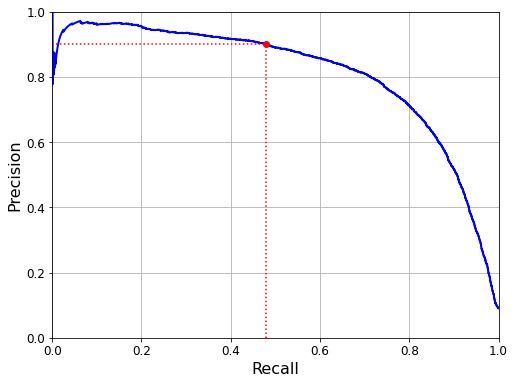

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2);
    plt.xlabel("Recall", fontsize=16);
    plt.ylabel("Precision", fontsize=16);
    plt.axis([0, 1, 0, 1]);
    plt.grid(True);

plt.figure(figsize=(8, 6));
plot_precision_vs_recall(precisions, recalls);
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:");
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:");
plt.plot([recall_90_precision], [0.9], "ro");
plt.show();

3370.0194991439557

0.9000345901072293

0.4799852425751706

## The ROC Curve

In [ ]:
from sklearn.metrics import roc_curve;



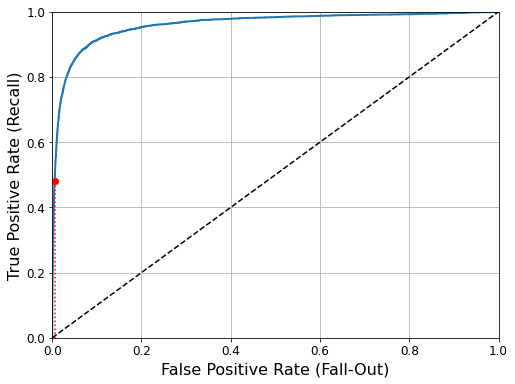

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label);
    plt.plot([0, 1], [0, 1], 'k--');
    plt.axis([0, 1, 0, 1]);
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16);
    plt.ylabel('True Positive Rate (Recall)', fontsize=16);
    plt.grid(True);

plt.figure(figsize=(8, 6));
plot_roc_curve(fpr, tpr);
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)];
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:");
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:");
plt.plot([fpr_90], [recall_90_precision], "ro");
plt.show();

In [ ]:
from sklearn.metrics import roc_auc_score;



0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier;




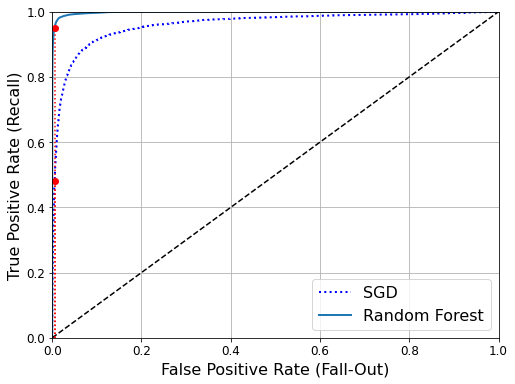

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)];

plt.figure(figsize=(8, 6));
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD");
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest");
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:");
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:");
plt.plot([fpr_90], [recall_90_precision], "ro");
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:");
plt.plot([fpr_90], [recall_for_forest], "ro");
plt.grid(True);
plt.legend(loc="lower right", fontsize=16);
plt.show();

0.9983436731328145

0.9905083315756169

0.8662608374838591

# Clasificación multiclase

In [ ]:
from sklearn.svm import SVC;




array([0], dtype=uint8)

array([[ 9.29838234,  7.09167958,  3.82972099,  1.79572006,  5.8885703 ,
         0.7913911 ,  2.80027801,  8.10392157, -0.22656281,  4.83753243]])

0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

5

In [ ]:
from sklearn.multiclass import OneVsRestClassifier;



array([0], dtype=uint8)

10

array([0], dtype=uint8)

array([[ 14390.59839396, -36919.31719967,  -9811.47434817,
         -8054.56345089, -21825.25725463, -11313.62371972,
        -23649.39025808, -15986.78463914,  -3798.52944589,
        -10635.46503726]])

**Warning**: las dos celdas siguientes pueden tardar en ejecutarse más de 30 minutos, dependiendo del hardware que uses.

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler




array([0.8983, 0.891 , 0.9018])

# Error Analysis

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [ ]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8));
    ax = fig.add_subplot(111);
    cax = ax.matshow(matrix);
    fig.colorbar(cax);

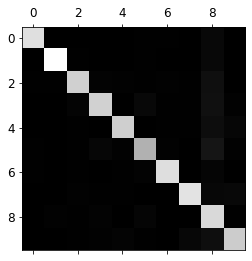

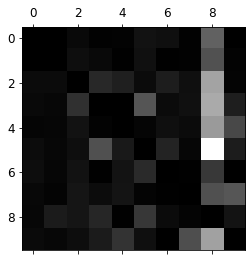

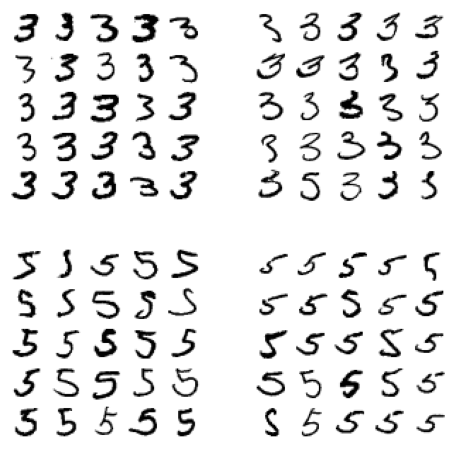

In [ ]:
cl_a, cl_b = 3, 5;
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)];
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)];
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)];
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)];

plt.figure(figsize=(8,8));
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5);
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5);
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5);
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5);
plt.show();